# Logistic Regression in Python

## Import packages

In [90]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Data


In [91]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [92]:
print(x,y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


- x : 2 kolom untuk satu masukan, 10 baris masing-masing sesuai dengan satu pengamatan
- y : satu dimensi dengan 10 item

In [93]:
model = LogisticRegression(solver="liblinear", random_state=42)

In [94]:
model.fit(x, y)

LogisticRegression(random_state=42, solver='liblinear')

In [95]:
model.classes_

array([0, 1])

In [96]:

print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


In [97]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [98]:
for i in model.predict_proba(x):
    if i[0] > 0.5:
        print(0)
    else:
        print(1)

0
0
0
1
1
1
1
1
1
1


In [99]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [100]:
model.score(x, y)

0.9

In [101]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

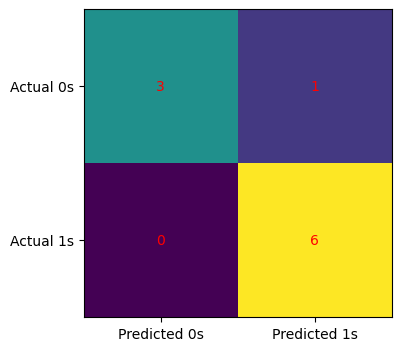

In [102]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [103]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [104]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [105]:
print(model.intercept_, model.coef_)

[-3.51335372] [[1.12066084]]


In [106]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [107]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [108]:
model.score(x, y)

1.0

In [109]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [110]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



### Handwriting Recognition

In [111]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [112]:
x, y = load_digits(return_X_y=True)

In [113]:
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [114]:
x.shape

(1797, 64)

In [115]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

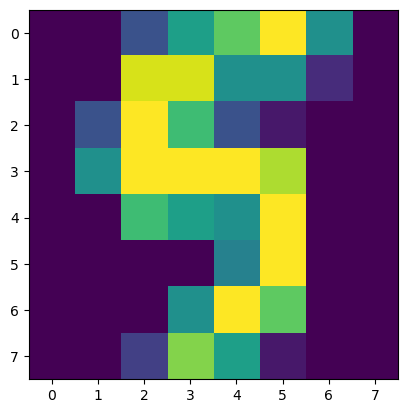

In [116]:
plt.imshow(x[1700].reshape(8,8))
plt.show()

In [117]:
y[1700]

5

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [119]:
scaler = StandardScaler()

In [120]:
x_train_scaled = scaler.fit_transform(x_train)

In [121]:
x_train[0].reshape(8, 8)

array([[ 0.,  0.,  7., 16., 11.,  1.,  0.,  0.],
       [ 0.,  1., 15., 12., 12., 12.,  0.,  0.],
       [ 0.,  2., 16.,  2.,  6., 16.,  2.,  0.],
       [ 0.,  1., 16.,  6.,  6., 16.,  6.,  0.],
       [ 0.,  0.,  7., 16., 15., 16.,  9.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 12., 11.,  0.],
       [ 0.,  0.,  3.,  3.,  6., 16.,  5.,  0.],
       [ 0.,  0.,  8., 16., 14.,  6.,  0.,  0.]])

In [122]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train_scaled, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [123]:
x_test_scaled = scaler.transform(x_test)

In [124]:
y_pred = model.predict(x_test_scaled)

In [125]:
model.score(x_train_scaled, y_train)

0.9617258176757133

In [126]:
model.score(x_test_scaled, y_test)

0.9527777777777777

In [127]:
confusion_matrix(y_test, y_pred)

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 45,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  1, 33,  0,  1,  0,  0,  3,  0],
       [ 0,  1,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  0],
       [ 0,  1,  0,  1,  0,  1,  1,  0, 26,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 39]], dtype=int64)

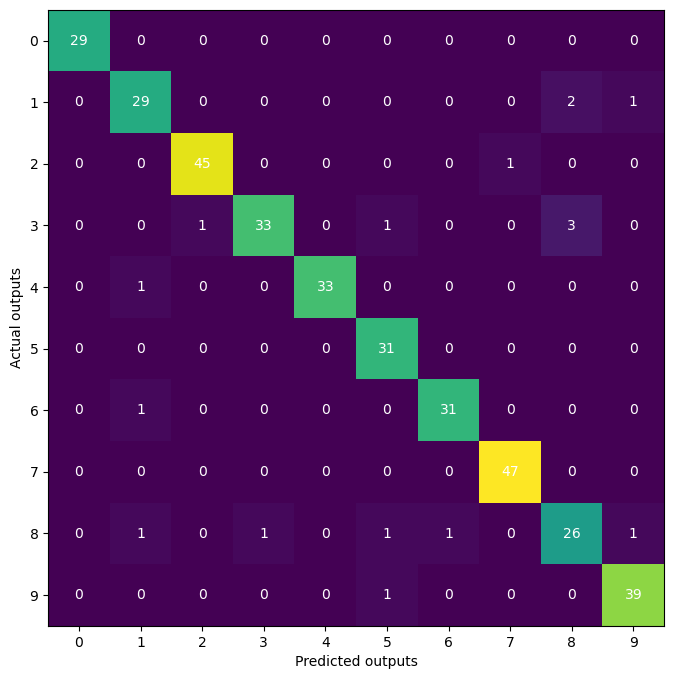

In [128]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.91      0.91      0.91        32
           2       0.98      0.98      0.98        46
           3       0.97      0.87      0.92        38
           4       1.00      0.97      0.99        34
           5       0.91      1.00      0.95        31
           6       0.97      0.97      0.97        32
           7       0.98      1.00      0.99        47
           8       0.84      0.84      0.84        31
           9       0.95      0.97      0.96        40

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



### KNN

In [130]:
# Assigning features and label variables

# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']


In [131]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# labelencoder (encode y)
le = LabelEncoder()

# onehot
oh = OneHotEncoder()

oe = OrdinalEncoder(categories=[["Cool", "Mild", "Hot"]])

In [132]:
weather_array = np.array(weather).reshape(-1, 1)
temp_array = np.array(temp).reshape(-1, 1)

In [133]:
print(weather_array)
print(temp_array)

[['Sunny']
 ['Sunny']
 ['Overcast']
 ['Rainy']
 ['Rainy']
 ['Rainy']
 ['Overcast']
 ['Sunny']
 ['Sunny']
 ['Rainy']
 ['Sunny']
 ['Overcast']
 ['Overcast']
 ['Rainy']]
[['Hot']
 ['Hot']
 ['Hot']
 ['Mild']
 ['Cool']
 ['Cool']
 ['Cool']
 ['Mild']
 ['Cool']
 ['Mild']
 ['Mild']
 ['Mild']
 ['Hot']
 ['Mild']]


In [134]:
weather_encoded = oh.fit_transform(weather_array).toarray()
temp_encoded = oe.fit_transform(temp_array)

In [135]:
print(weather_encoded)
print(temp_encoded)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[2.]
 [2.]
 [2.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]]


In [136]:
features_encoded = np.concatenate([weather_encoded, temp_encoded], axis=1)
print(features_encoded)

[[0. 0. 1. 2.]
 [0. 0. 1. 2.]
 [1. 0. 0. 2.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 2.]
 [0. 1. 0. 1.]]


In [137]:
label_encoded = le.fit_transform(play)
print(label_encoded)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [138]:
assert features_encoded.shape[0] == len(label_encoded)

In [139]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(features_encoded, label_encoded)

KNeighborsClassifier(n_neighbors=3)

In [140]:
model.predict([[0, 0, 1, 0]])

array([1], dtype=int64)

In [141]:
input = ["Sunny", "Hot"]

model.predict(
    np.concatenate([
        oh.transform(np.array([input[0]]).reshape(-1,1)).toarray(),
        oe.transform(np.array([input[1]]).reshape(-1,1))
    ], axis=1)
)

array([0], dtype=int64)

In [142]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [143]:
# print the label species(class_0, class_1, class_2)
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [144]:
print(wine.data[:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [145]:
print(wine.data.shape)

(178, 13)


In [146]:
# print target(or label)shape
print(wine.target.shape)

(178,)


In [147]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=21) # 70% training and 30% test


In [148]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [149]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7037037037037037


In [150]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [151]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6851851851851852


In [152]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

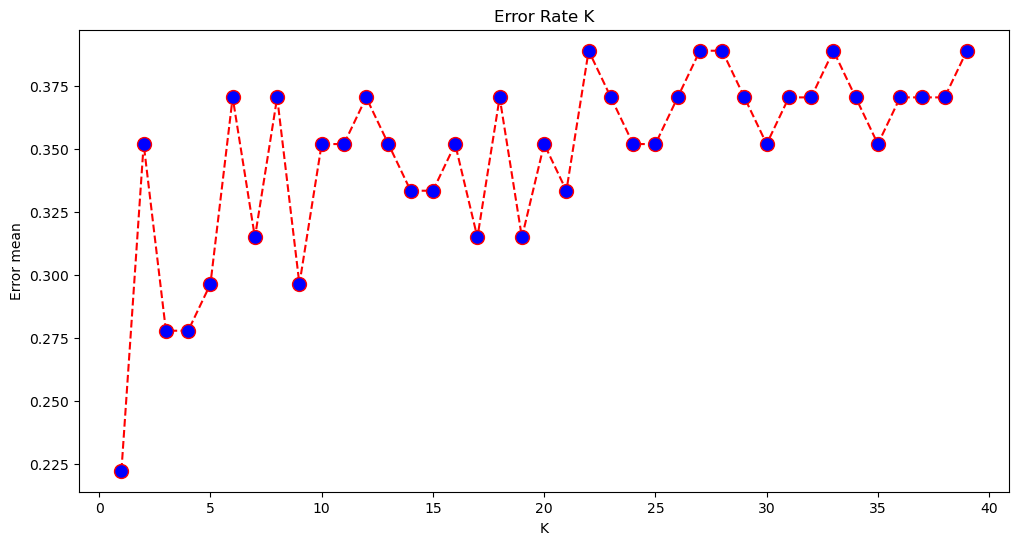

In [153]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [154]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778


In [155]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=25)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6481481481481481
